In [1]:
# Import package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data in Dataframe from CSV file
df_loan = pd.read_csv('loan.csv', encoding = 'ISO-8859-1')


D:\Anaconda3\envs\snake\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
df_loan.shape

(39717, 111)

In [5]:
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
df_loan.isnull().sum()/df_loan.shape[0] * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [7]:
df_loan = df_loan.dropna(axis=1, how='all')
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
# Drop column from data frame
df_loan = df_loan.drop(['mths_since_last_record', 'next_pymnt_d','desc'],\
                 axis=1)

In [9]:
df_loan.shape

(39717, 54)

In [10]:
#After the NULL Value cleanup - IDentify the distribution of null values across columns
(df_loan.isnull().sum()/df_loan.shape[0] *100).sort_values(ascending = False)

mths_since_last_delinq        64.662487
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
term                           0.000000
issue_d                        0.000000
member_id                      0.000000
loan_amnt                      0.000000
purpose                        0.000000
url                            0.000000
pymnt_plan                     0.000000
funded_amnt                    0.000000
loan_status                    0.000000
verification_status            0.000000
annual_inc                     0.000000
home_ownership                 0.000000
funded_amnt_inv                0.000000
addr_state                     0.000000


In [11]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [12]:
df_loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
mths_since_last_delinq      

In [13]:
df_loan.mths_since_last_delinq.isnull().sum()


25682

In [14]:
df_loan.mths_since_last_delinq.head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

In [15]:
# analysis mths_since_last_delinq column for Nan valuehandling 
df_loan.mths_since_last_delinq.describe()

count    14035.000000
mean        35.900962
std         22.020060
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [16]:
# Fill median value inplace of Nan value
df_loan['mths_since_last_delinq'] = df_loan.mths_since_last_delinq.fillna(0)

In [17]:
df_loan.mths_since_last_delinq.head()

0     0.0
1     0.0
2     0.0
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

In [18]:
df_loan['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [19]:
# trim extra characters
df_loan['term'] = df_loan['term'].str.replace('[^0-9]+', '')
df_loan['term'] = df_loan['term'].astype('int')

In [20]:
df_loan['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32

In [21]:
df_loan['term'].count()

39717

In [22]:
df_loan['emp_length'] = df_loan['emp_length'].str.replace('[^0-9]+', '')

In [23]:
df_loan['emp_length'].head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: object

In [24]:
df_loan['emp_length'].isnull().sum()

1075

In [25]:
# Analysis emp_length mean,median, std
df_loan['emp_length'] = df_loan['emp_length'].astype('float')
df_loan['emp_length'].describe()

count    38642.000000
mean         5.092050
std          3.408338
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [26]:
# fill median for replace Nan value
df_loan['emp_length'] = df_loan['emp_length'].fillna(4)
df_loan['emp_length'].head()

0    10.0
1     1.0
2    10.0
3    10.0
4     1.0
Name: emp_length, dtype: float64

In [27]:
# remove % int_rate string
df_loan['int_rate'] = df_loan['int_rate'].str.split('%',expand = True)[0]

In [28]:
df_loan['int_rate'].isnull().sum()

0

In [29]:
df_loan['int_rate'] = df_loan.int_rate.astype('float')

In [30]:
# Make uniform string value
df_loan['home_ownership'] = df_loan['home_ownership'].apply(lambda x: x.upper().strip())

In [31]:
df_loan['home_ownership'].head()

0    RENT
1    RENT
2    RENT
3    RENT
4    RENT
Name: home_ownership, dtype: object

In [32]:
df_loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [33]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null int32
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    39717 non-null float64
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

In [34]:
df_loan.to_csv('loan_clean.csv')

In [35]:
# there seems to be an anomaly in annual income
df_loan['annual_inc'] = df_loan.annual_inc.astype('int')

df_loan['annual_inc'].describe()

count    3.971700e+04
mean     6.896892e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [36]:
# Remove Outliers 
outlair = df_loan["annual_inc"].quantile(0.95)
df_loan = df_loan[df_loan["annual_inc"] < outlair]
df_loan['annual_inc'].describe()

count     37730.000000
mean      61043.969812
std       27795.212519
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      141996.000000
Name: annual_inc, dtype: float64

In [37]:
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.773000e+04,3.773000e+04,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,37730.000000,...,37730.000000,37730.000000,37730.000000,37685.0,37730.0,37730.0,37685.0,37730.0,37072.000000,37700.0
mean,6.826876e+05,8.499785e+05,10845.205407,10591.084018,10059.287508,42.355261,11.971601,313.851390,5.023191,61043.969812,...,92.406357,11.833256,2565.365979,0.0,1.0,0.0,0.0,0.0,0.044400,0.0
std,2.106501e+05,2.656105e+05,7153.931580,6895.486242,6833.589787,10.589613,3.697439,199.482913,3.353705,27795.212519,...,670.687193,143.536764,4260.418582,0.0,0.0,0.0,0.0,0.0,0.206769,0.0
min,5.473400e+04,7.472400e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,1.000000,4000.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162295e+05,6.668698e+05,5075.000000,5000.000000,5000.000000,36.000000,8.940000,163.960000,2.000000,40000.000000,...,0.000000,0.000000,213.362500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.644305e+05,8.493725e+05,9600.000000,9250.000000,8500.000000,36.000000,11.830000,273.100000,4.000000,56000.000000,...,0.000000,0.000000,523.450000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.369072e+05,1.046490e+06,15000.000000,14575.000000,13952.765275,60.000000,14.460000,412.045000,8.000000,78000.000000,...,0.000000,0.000000,3164.062500,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,10.000000,141996.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [38]:
correlation=df_loan[['funded_amnt','installment','annual_inc','dti','mths_since_last_delinq','open_acc','pub_rec','revol_bal',\
             'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',\
             'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt',\
             'pub_rec_bankruptcies']]
cor = correlation.corr()
round(cor, 2)

,funded_amnt,installment,annual_inc,dti,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
funded_amnt,1.00,0.96,0.40,0.09,-0.05,0.16,-0.05,0.31,0.23,0.20,0.20,0.90,0.86,0.86,0.74,0.04,0.14,0.07,0.45,-0.03
installment,0.96,1.00,0.40,0.08,-0.03,0.16,-0.04,0.31,0.21,0.12,0.12,0.85,0.81,0.84,0.63,0.05,0.12,0.07,0.40,-0.03
annual_inc,0.40,0.40,1.00,-0.07,0.03,0.26,-0.01,0.40,0.39,0.06,0.06,0.38,0.37,0.38,0.27,0.00,0.04,0.02,0.21,-0.01
dti,0.09,0.08,-0.07,1.00,-0.02,0.30,-0.01,0.27,0.25,0.04,0.04,0.09,0.10,0.07,0.13,-0.01,0.03,0.01,0.02,0.00
mths_since_last_delinq,-0.05,-0.03,0.03,-0.02,1.00,0.04,0.06,-0.07,0.09,-0.01,-0.01,-0.03,-0.03,-0.05,0.02,0.02,0.00,0.00,-0.02,0.03
open_acc,0.16,0.16,0.26,0.30,0.04,1.00,0.01,0.29,0.68,0.03,0.03,0.15,0.14,0.15,0.11,-0.02,0.02,0.00,0.07,0.01
pub_rec,-0.05,-0.04,-0.01,-0.01,0.06,0.01,1.00,-0.06,-0.02,-0.01,-0.02,-0.05,-0.05,-0.06,-0.00,-0.00,-0.01,-0.01,-0.03,0.85
revol_bal,0.31,0.31,0.40,0.27,-0.07,0.29,-0.06,1.00,0.31,0.06,0.06,0.29,0.27,0.27,0.24,0.00,0.04,0.02,0.12,-0.05
total_acc,0.23,0.21,0.39,0.25,0.09,0.68,-0.02,0.31,1.00,0.03,0.03,0.21,0.20,0.21,0.13,-0.03,0.02,0.01,0.16,-0.01
out_prncp,0.20,0.12,0.06,0.04,-0.01,0.03,-0.01,0.06,0.03,1.00,1.00,0.24,0.25,0.17,0.38,-0.00,-0.02,-0.01,-0.07,-0.01


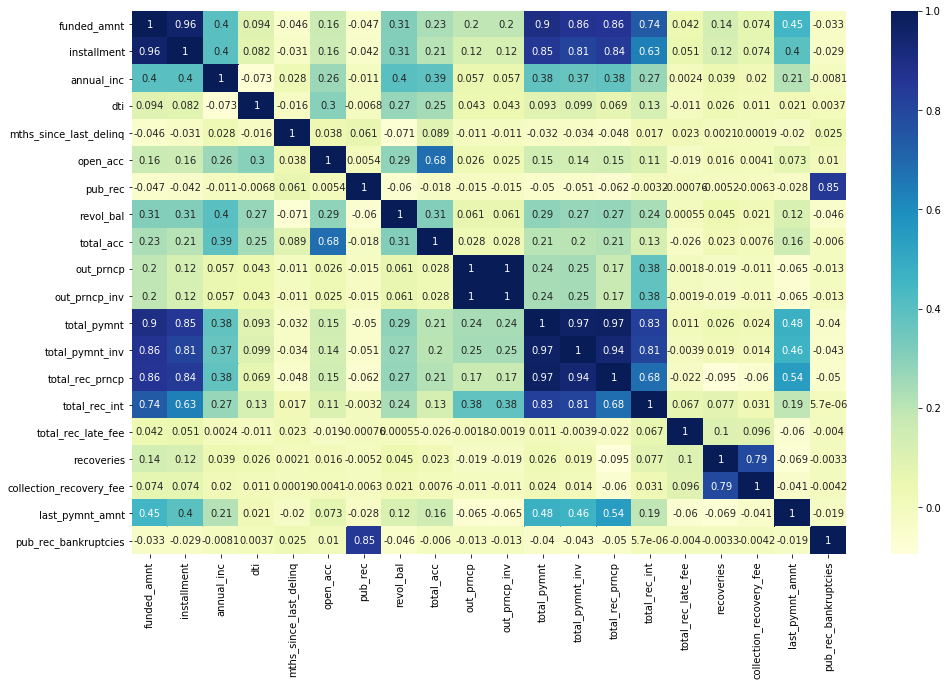

In [39]:
# Correlation Matrix analysis
# figure size
plt.figure(figsize=(16,10))

# heatmap
# drew a correlation matrix
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [40]:
#checkpoint 3
# Uni-variate analysis

# Let us look at some of the features and analyze them

# 1. loan_amnt
# 2. funded_amnt
# 3. funded_amnt_inv
# 4. term
# 5. int_rate
# 6. installment
# 7. emp_length
# 8. annual_inc

D:\Anaconda3\envs\snake\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


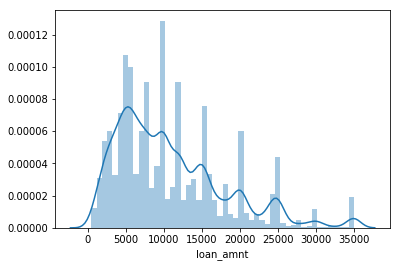

In [41]:
# 3. Univariate

#loan_amnt
# simple density plot
sns.distplot(df_loan['loan_amnt'], hist=True, rug=False)
plt.show()

D:\Anaconda3\envs\snake\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\envs\snake\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\envs\snake\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\envs\snake\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda3\envs\snake\lib\site-packages\matplotlib\axes\_axes.py:6462:

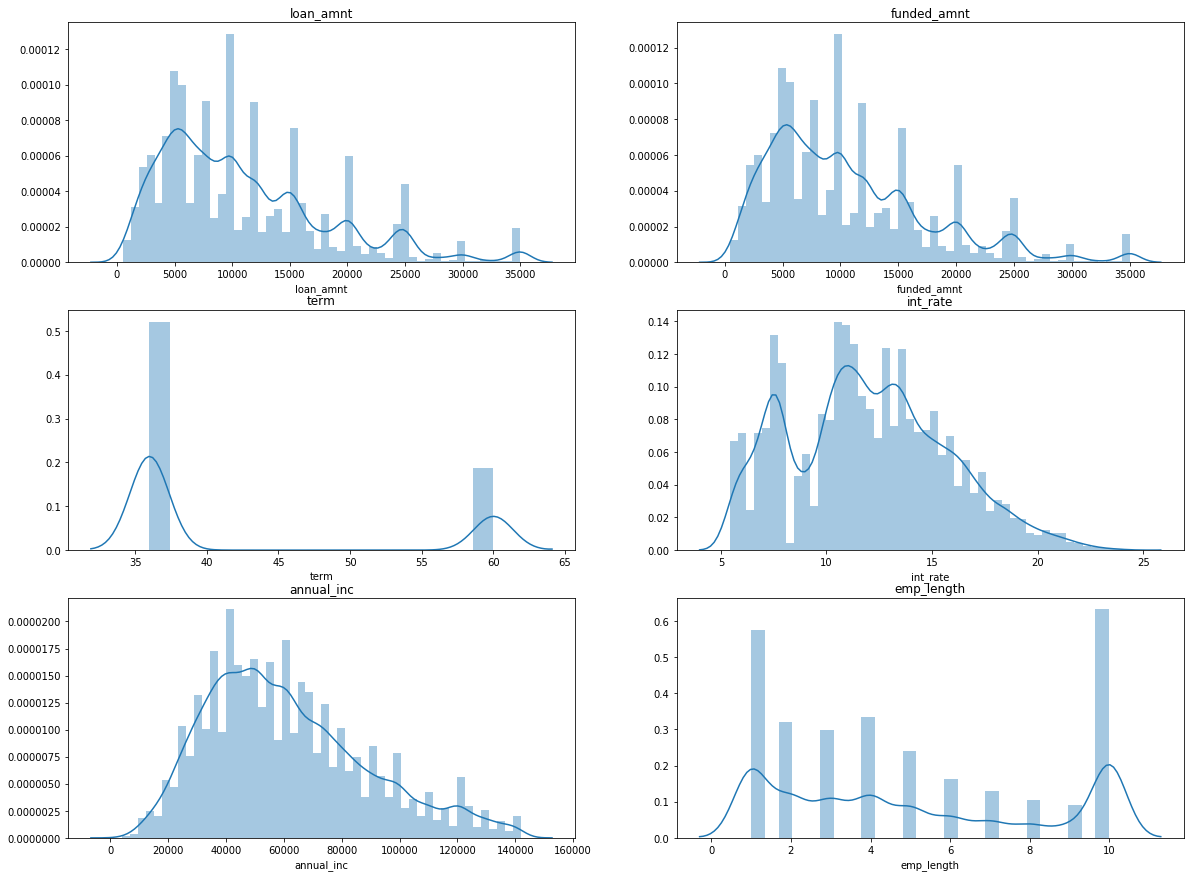

In [42]:
# Let us do simple density plot with subplots for each variable

# subplots

plt.figure(figsize=(20,15))
# subplot 1
plt.subplot(3, 2, 1)
plt.title('loan_amnt')
sns.distplot(df_loan['loan_amnt'])

# subplot 2
plt.subplot(3, 2, 2)
plt.title('funded_amnt')
sns.distplot(df_loan['funded_amnt'])

# subplot 3
plt.subplot(3, 2, 3)
plt.title('term')
sns.distplot(df_loan['term'])

# subplot 4
plt.subplot(3, 2, 4)
plt.title('int_rate')
sns.distplot(df_loan['int_rate'])

# subplot 5
plt.subplot(3, 2, 5)
plt.title('annual_inc')
sns.distplot(df_loan['annual_inc'])

# subplot 6
plt.subplot(3, 2, 6)
plt.title('emp_length')
sns.distplot(df_loan['emp_length'])


plt.show()

In [43]:
df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

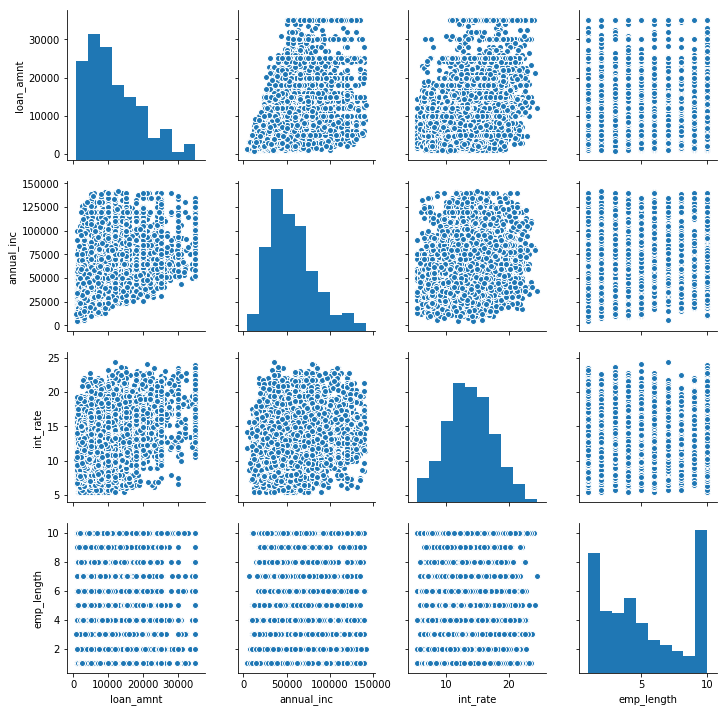

In [44]:
# pairplot
defaulter = df_loan[df_loan['loan_status']== 'Charged Off']
sns.pairplot(defaulter[['loan_amnt','annual_inc','int_rate','emp_length']])
plt.show()

In [45]:
# Visual correlation heat map
style_map = sns.light_palette("green", as_cmap=True)

defaulter[['loan_amnt','annual_inc','int_rate','emp_length','installment', 'dti', 'verification_status',\
          'term', 'revol_util', 'pub_rec_bankruptcies', 'revol_util']].corr().style.background_gradient(cmap = style_map).set_precision(2)

,loan_amnt,annual_inc,int_rate,emp_length,installment,dti,term,pub_rec_bankruptcies
loan_amnt,1,0.46,0.34,0.19,0.93,0.078,0.39,-0.02
annual_inc,0.46,1,0.15,0.21,0.46,-0.029,0.13,0.03
int_rate,0.34,0.15,1,0.041,0.32,0.042,0.46,0.08
emp_length,0.19,0.21,0.041,1,0.17,0.062,0.14,0.051
installment,0.93,0.46,0.32,0.17,1,0.054,0.14,-0.018
dti,0.078,-0.029,0.042,0.062,0.054,1,0.066,0.018
term,0.39,0.13,0.46,0.14,0.14,0.066,1,0.02
pub_rec_bankruptcies,-0.02,0.03,0.08,0.051,-0.018,0.018,0.02,1


In [46]:
df_loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [47]:
# Visual correlation heat map
FullyPaid = df_loan[df_loan['loan_status']== 'Fully Paid']
style_map = sns.light_palette("green", as_cmap=True)
FullyPaid[['loan_amnt','annual_inc','int_rate','emp_length','installment', 'dti', 'verification_status',\
          'term', 'pub_rec_bankruptcies','revol_util']].corr().style.background_gradient(cmap = style_map).set_precision(2)

,loan_amnt,annual_inc,int_rate,emp_length,installment,dti,term,pub_rec_bankruptcies
loan_amnt,1,0.4,0.27,0.14,0.93,0.09,0.33,-0.036
annual_inc,0.4,1,0.055,0.2,0.39,-0.078,0.086,-0.0099
int_rate,0.27,0.055,1,-0.012,0.26,0.12,0.41,0.079
emp_length,0.14,0.2,-0.012,1,0.11,0.055,0.098,0.065
installment,0.93,0.39,0.26,0.11,1,0.082,0.076,-0.031
dti,0.09,-0.078,0.12,0.055,0.082,1,0.074,-0.0016
term,0.33,0.086,0.41,0.098,0.076,0.074,1,0.0049
pub_rec_bankruptcies,-0.036,-0.0099,0.079,0.065,-0.031,-0.0016,0.0049,1


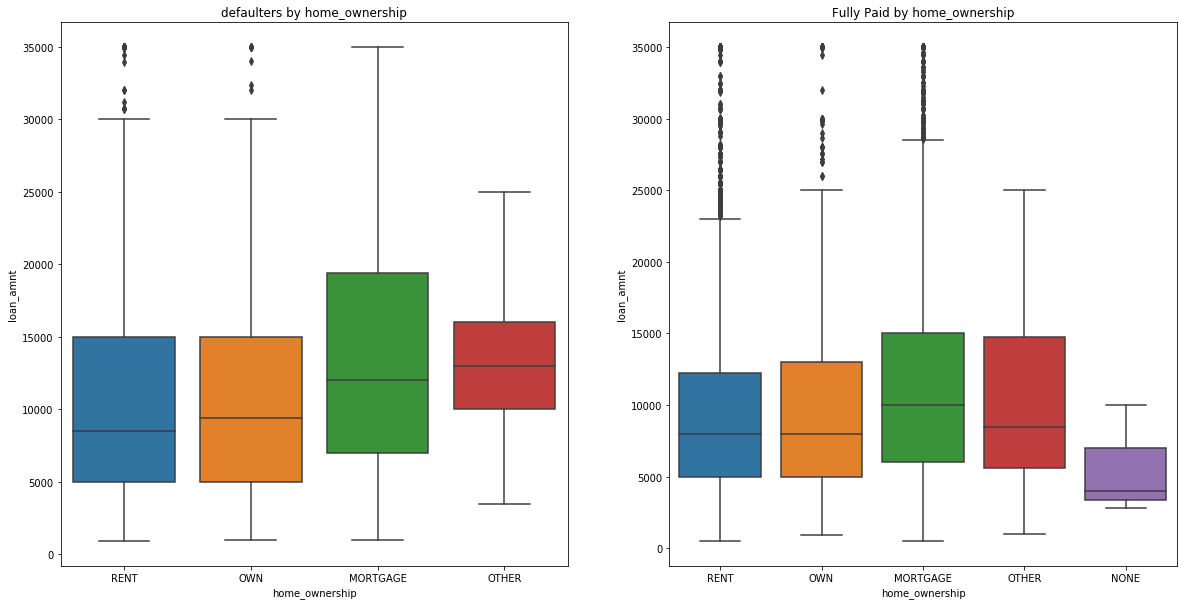

In [48]:
# Analysis home_ownership median, std, outlier 

plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.boxplot(x='home_ownership', y='loan_amnt',data = defaulter)
plt.title('defaulters by home_ownership')

plt.subplot(1,2,2)
sns.boxplot(x='home_ownership', y='loan_amnt',data = FullyPaid)
plt.title('Fully Paid by home_ownership')
plt.show()

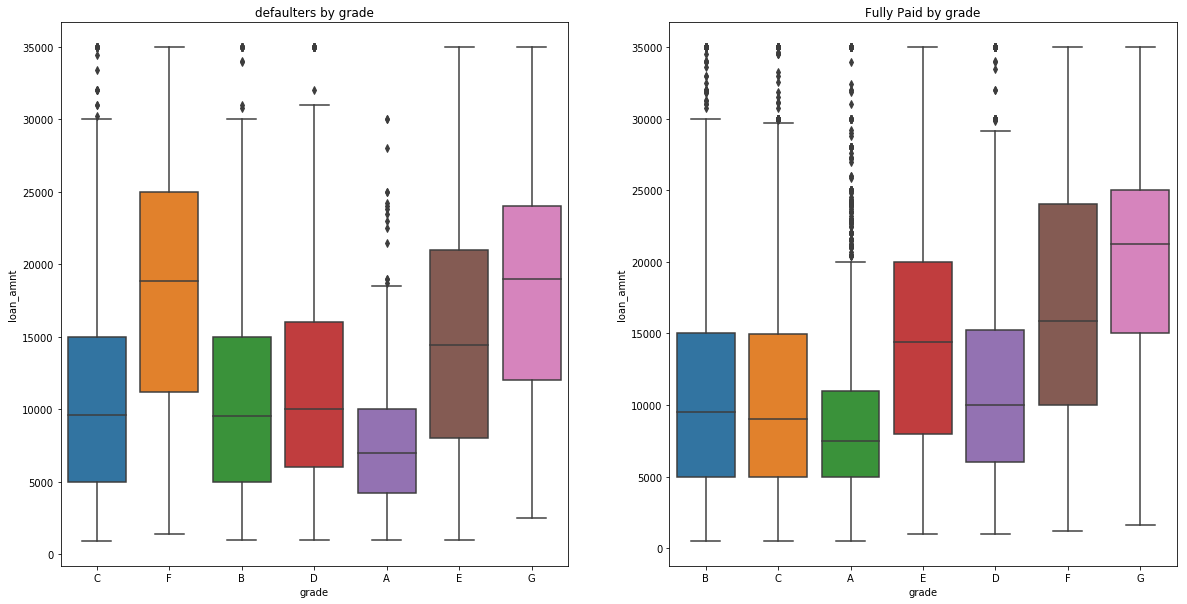

In [49]:
# Analysis Grade median, std, outlier
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.boxplot(x='grade', y='loan_amnt',data = defaulter)
plt.title('defaulters by grade')
plt.subplot(1,2,2)
sns.boxplot(x='grade', y='loan_amnt',data = FullyPaid)
plt.title('Fully Paid by grade')
plt.show()

In [50]:
 grpstate = df_loan.groupby(['loan_status','addr_state'])[['annual_inc']]

In [51]:
grpstate.describe()


annual_inc                                       \
                            count          mean           std      min   
loan_status addr_state                                                   
Charged Off AK               13.0  59947.846154  14816.210952  36000.0   
            AL               52.0  50158.211538  24127.790271  15000.0   
            AR               26.0  49529.038462  29534.741055  13728.0   
            AZ              117.0  53550.188034  24258.344276  13000.0   
            CA             1073.0  59500.856477  27437.437548   4080.0   
            CO               96.0  54296.947917  25126.519820  10400.0   
            CT               91.0  57248.252747  23425.180479  14400.0   
            DC               13.0  66605.538462  29458.324666  18720.0   
            DE               12.0  58246.166667  24841.863837  26004.0   
            FL              485.0  52260.074227  25020.811492  10000.0   
            GA              209.0  55932.090909  26939.024278  12000.0   
            HI               28.0  56349.285714  28196.774159  22440.0   
            ID                1.0  35244.000000           NaN  35244.0   
            IL              192.0  55947.833333  25814.666938   8000.0   
            KS               30.0  51354.766667  30269.229677  18000.0   
            KY               45.0  51401.133333  25982.911148  12000.0   
            LA               51.0  53926.784314  29014.037670  12000.0   
            MA              150.0  55963.713333  26120.099809  14400.0   
            MD              156.0  63956.365385  30408.059928   9600.0   
            MI              100.0  57320.050000  28624.691704   9600.0   
            MN               81.0  53869.419753  21877.732093  16200.0   
            MO              111.0  49152.180180  22233.892477   6000.0   
            MS                2.0  47640.000000  17479.679631  35280.0   
            MT               11.0  69978.909091  36618.734630  12000.0   
            NC              113.0  54018.876106  24943.765982  12500.0   
            NE                3.0  47706.666667  23726.317315  32000.0   
            NH               25.0  74718.240000  34417.190261  25000.0   
            NJ              270.0  58210.966667  26346.667937   6000.0   
            NM               30.0  52584.933333  17968.988381  24000.0   
            NV              103.0  59538.233010  27061.701440  10000.0   
...                           ...           ...           ...      ...   
Fully Paid  MD              811.0  68617.831073  28497.463628   9600.0   
            ME                3.0  23866.666667  11307.224829  15000.0   
            MI              582.0  59540.493127  29455.326129   9192.0   
            MN              507.0  56887.455621  27496.838024  10000.0   
            MO              537.0  57120.398510  25019.299248   5500.0   
            MS               17.0  56001.705882  34588.282401  20000.0   
            MT               72.0  51489.319444  23424.052638  11688.0   
            NC              606.0  58247.831683  26086.128201   8280.0   
            NE                2.0  52500.000000  31819.805153  30000.0   
            NH              132.0  59490.984848  29007.973258  12000.0   
            NJ             1405.0  65859.988612  28568.892039   8500.0   
            NM              147.0  56745.333333  26517.471289  10000.0   
            NV              355.0  62273.687324  26896.174141  15000.0   
            NY             2998.0  62073.290861  26799.168033   7200.0   
            OH              996.0  56981.388554  27362.766062   9600.0   
            OK              241.0  60336.531120  28186.829157   8000.0   
            OR              358.0  56330.483240  27968.633905  10008.0   
            PA             1245.0  57904.555823  27104.102409   6000.0   
            RI              162.0  62104.919753  25467.019406  20000.0   
            SC              377.0  57185.201592  26994.516366   7200.0   
            SD             

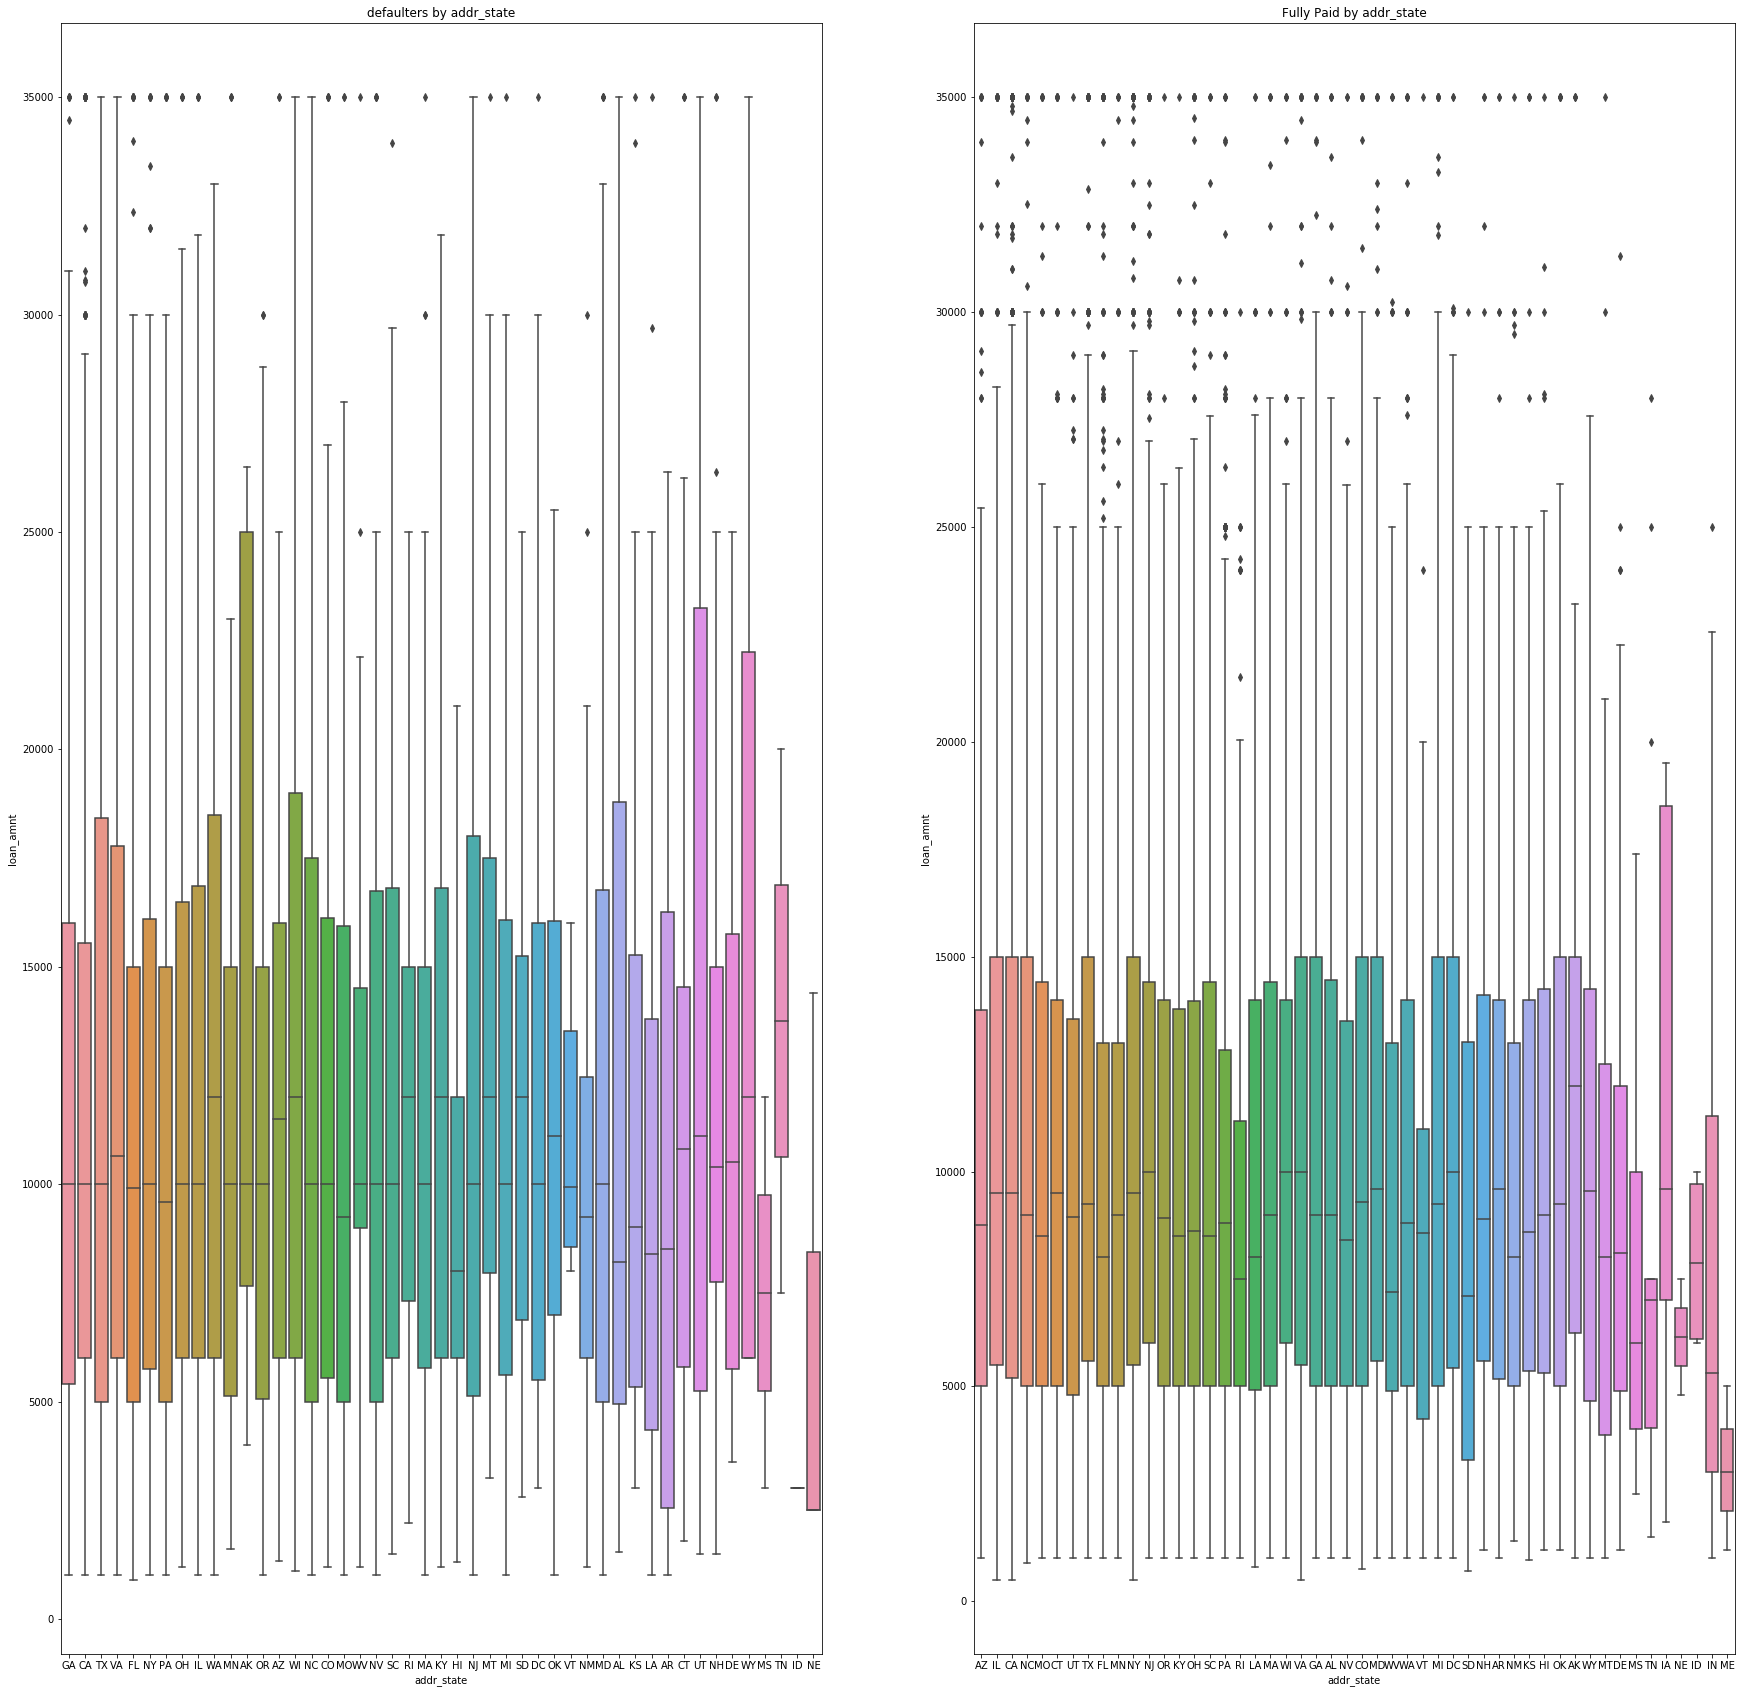

In [52]:
# Analysis State median, std, outlier
plt.figure(figsize = (30,30))
plt.subplot(1,2,1)
sns.boxplot(x='addr_state', y='loan_amnt',data = defaulter)
plt.title('defaulters by addr_state')
plt.subplot(1,2,2)
sns.boxplot(x='addr_state', y='loan_amnt',data = FullyPaid)
plt.title('Fully Paid by addr_state')
plt.show()
# customer who is taking high amount loan state 'UT'
# Problity high defaulting

In [53]:
# Effect of last payment on loan status
last_paymnt = df_loan[[ 'home_ownership','loan_status','pub_rec']]
last_paymnt1=last_paymnt

In [54]:
last_paymnt=last_paymnt.groupby(['loan_status'])
last_paymnt.describe()
# by this we conclude that if derogatory public record is high than Charged off possibility very high

pub_rec                                             
               count      mean       std  min  25%  50%  75%  max
loan_status                                                      
Charged Off   5420.0  0.086531  0.287661  0.0  0.0  0.0  0.0  2.0
Current       1054.0  0.042694  0.211445  0.0  0.0  0.0  0.0  2.0
Fully Paid   31256.0  0.051638  0.230644  0.0  0.0  0.0  0.0  4.0

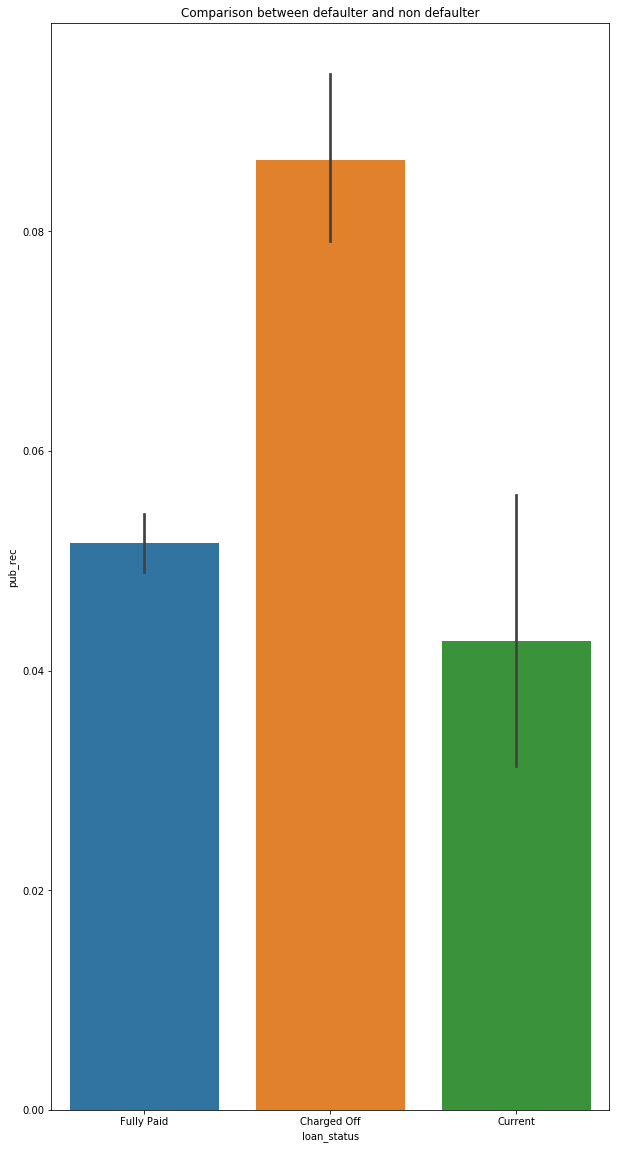

In [55]:
plt.figure(figsize=(10,20))
sns.barplot(x='loan_status', y='pub_rec', data=last_paymnt1)
plt.title('Comparison between defaulter and non defaulter')
plt.show()


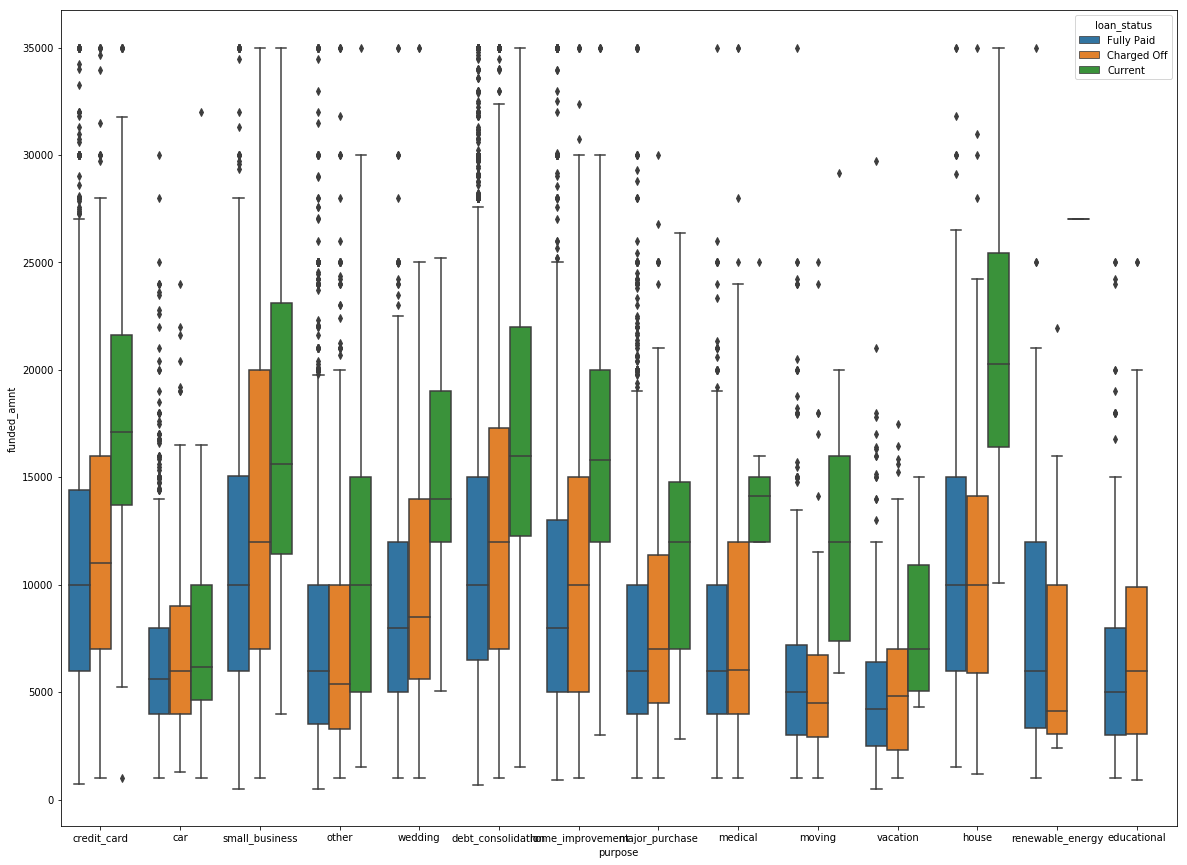

In [56]:
plt.figure(figsize = (20,15))
sns.boxplot(x='purpose',y='funded_amnt', data = df_loan, hue = 'loan_status')
plt.savefig('FUNDED_AMOUNT_BOX.png')   # save the figure to file
plt.show()

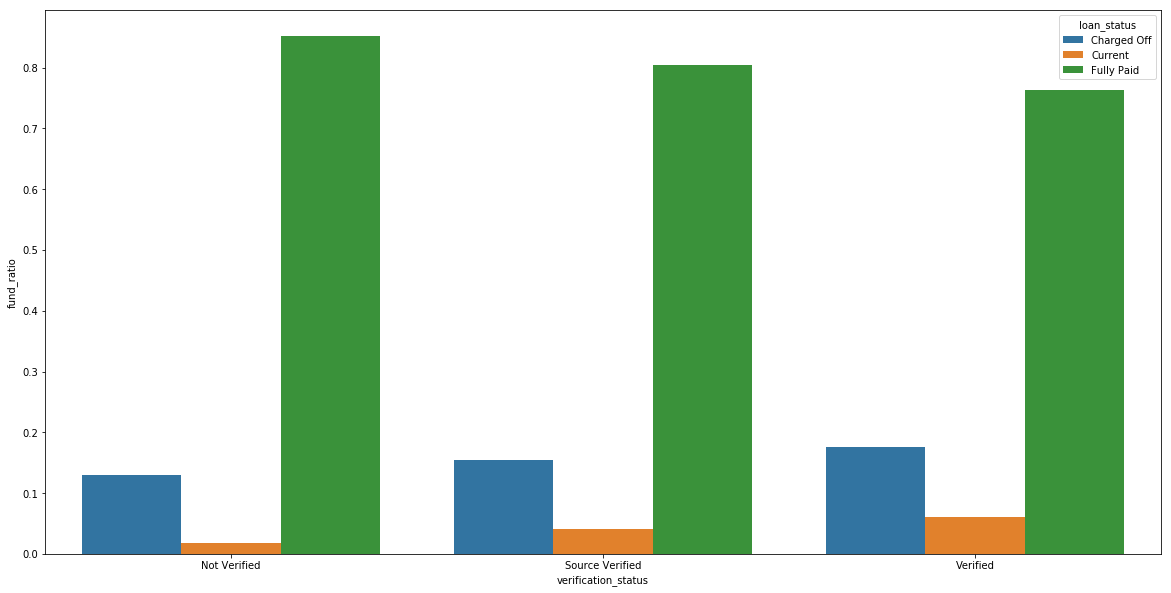

In [57]:
#----> verification_status - ratios within the category
verification_status = df_loan[['verification_status','loan_status','funded_amnt']]
s1 = verification_status.groupby(by = ['verification_status','loan_status']).funded_amnt.sum().reset_index()
s2 =  s1.groupby('verification_status').funded_amnt.sum().reset_index()
s1 = s1.merge(s2, how='inner', on = 'verification_status', suffixes=['','Total'])
s1['fund_ratio'] = s1.funded_amnt/s1.funded_amntTotal
plt.figure(figsize = (20,10))
sns.barplot(x='verification_status',y='fund_ratio', data = s1, hue = 'loan_status')
plt.savefig('fig_verification_status.png')   # save the figure to file
plt.show()

In [58]:
df_loan.installment.describe()

count    37730.000000
mean       313.851390
std        199.482913
min         15.690000
25%        163.960000
50%        273.100000
75%        412.045000
max       1305.190000
Name: installment, dtype: float64

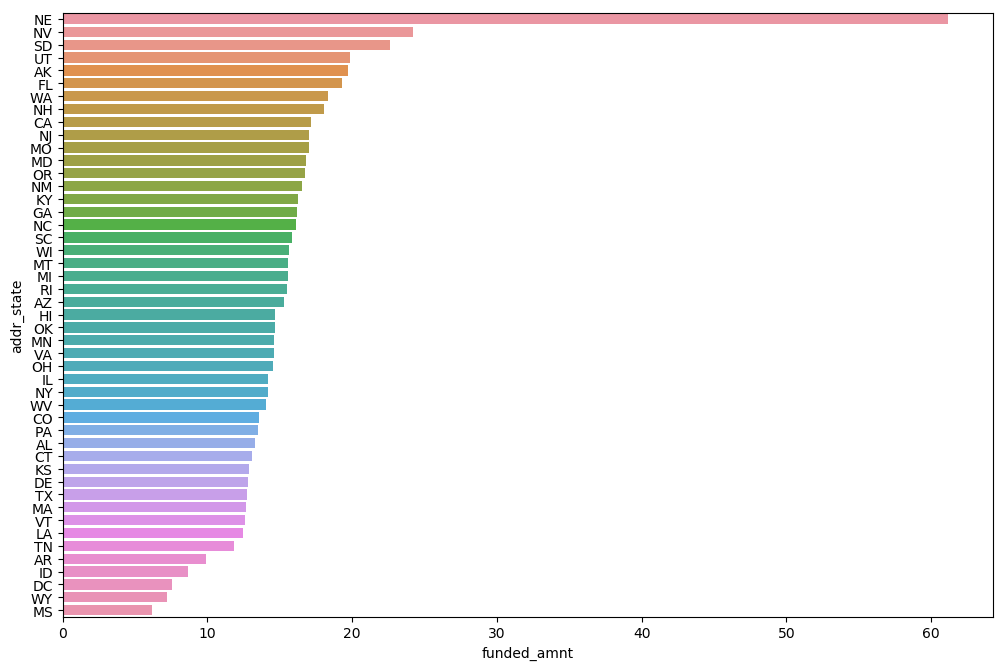

In [59]:
# State vs Funded amout vs loan status
df_st_ratio = df_loan.groupby(["addr_state","loan_status"]).agg({'funded_amnt': 'sum'})
state = df_loan.groupby(['addr_state']).agg({'funded_amnt': 'sum'})
df_st_ratio = df_st_ratio.div(state, level='addr_state') * 100
df_st_ratio = df_st_ratio.reset_index().sort_values(by='funded_amnt', ascending=False);
df_st_ratio
#plot for state with the highest ratio of defaultor.
plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
sns.barplot(x='funded_amnt', y='addr_state', data=df_st_ratio[df_st_ratio['loan_status']=='Charged Off'])
plt.show()

In [60]:
# Probablity of Charge-Off(Defaulter)
Defaulter_prob = defaulter.shape[0]/df_loan.shape[0]
Defaulter_prob

0.1436522661012457

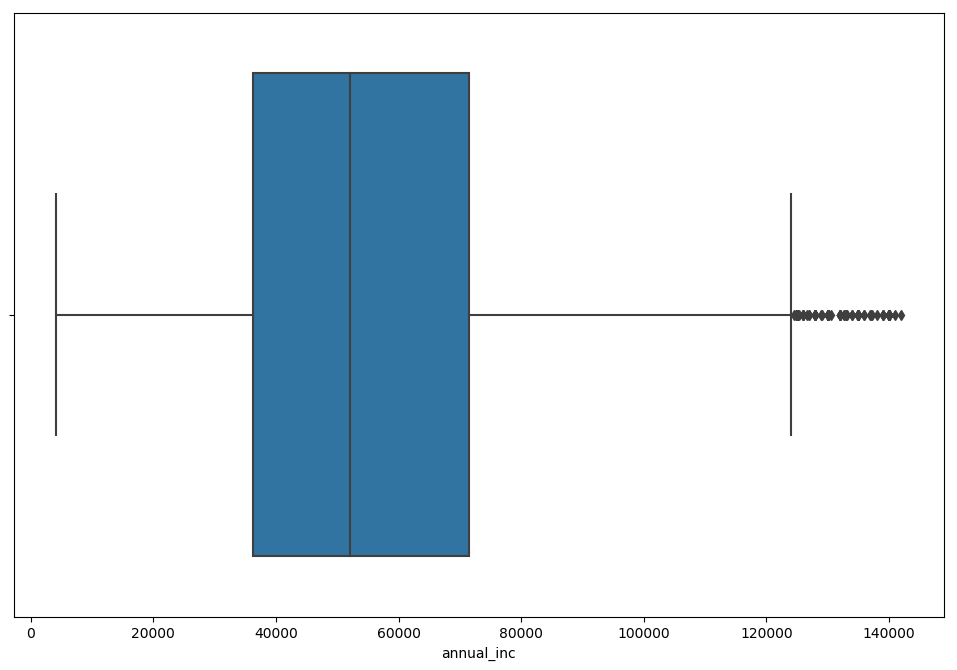

In [61]:
# Income vs Funded amout vs loan status

plt.figure(num=None, figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
sns.boxplot(defaulter['annual_inc'])
plt.show()

# high loan defaulter 25k to 65k

In [63]:
defaulter.funded_amnt.describe()
# 75% of people borrowed less than 15600 per loan
# let us count the number of such people
defaulter[defaulter.funded_amnt < 15600].funded_amnt.sum()/defaulter.funded_amnt.sum() #51% of the defaulted amount
# 51% of defautled amount is contributed by 75% of customers that means 25% of customers are causing almost 50% of the defaults

0.5145299776931487